# Pyber Ride Sharing - Miriam Berkowitz

### Analysis<br>
1. Rural cities have fewer rides and fewer drivers, but some of the highest fares.<br>
2. Urban cities have the most drivers, the most riders, and on average, among the lowest fares.<br>
3. Suburban cities are right in the middle.
4. It appears that rural cities have higher average fares per driver and higher fares per ride than suburban and urban cities.

In [1]:
from matplotlib import pyplot as plt
from scipy import stats

import numpy as np
import pandas as pd

import seaborn as sns
sns.set(color_codes=True)

In [2]:
#read the files
city_data = pd.read_csv("city_data.csv")
ride_data = pd.read_csv("ride_data.csv")

In [3]:
city_data.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [4]:
#computing additional data for analysis
total_drivers = city_data['driver_count'].sum()
total_rides = ride_data['ride_id'].count()
total_fares = ride_data['fare'].sum()

In [5]:
#compute average fare per city
ride_group = ride_data.groupby(['city'])
avg_fares = pd.DataFrame(ride_group['fare'].mean())

avg_fares.head()

#compute total fares per city
tot_fares = pd.DataFrame(ride_group['fare'].sum())
tot_fares.head()
tot_fares.reset_index(inplace=True)
                         

In [6]:
#compute rides per city
rides_per_city = pd.DataFrame(ride_group['ride_id'].count())
rides_per_city.reset_index(inplace=True)


In [7]:
rides_per_city.head()


,city,ride_id
0,Alvarezhaven,31
1,Alyssaberg,26
2,Anitamouth,9
3,Antoniomouth,22
4,Aprilchester,19


In [8]:
#Drivers per city is city_data['driver_count]
city_data['driver_count'].head()

0    63
1     8
2    12
3    34
4    52
Name: driver_count, dtype: int64

In [9]:
#compute city types
city_types = city_data.groupby(['type'])
types = city_types['driver_count'].count()
types.head()

type
Rural       18
Suburban    42
Urban       66
Name: driver_count, dtype: int64

In [10]:
#join the city and ride data, and group by city 
merge_table = pd.merge(city_data, ride_data, on="city")
ride_group = merge_table.groupby(['city'])


In [11]:
#write to csv
merge_table.to_csv('merged_pyber.csv', index=False, header=True)

In [12]:
avg_fares.reset_index(inplace=True)
avg_fares.head()

,city,fare
0,Alvarezhaven,23.928710
1,Alyssaberg,20.609615
2,Anitamouth,37.315556
3,Antoniomouth,23.625000
4,Aprilchester,21.981579


In [13]:
#create city summary: city, driver count, type, avg fare

city_summary = pd.merge(city_data, avg_fares, on="city")
city_summary.head()

,city,driver_count,type,fare
0,Kelseyland,63,Urban,21.806429
1,Nguyenbury,8,Urban,25.899615
2,East Douglas,12,Urban,26.169091
3,West Dawnfurt,34,Urban,22.330345
4,Rodriguezburgh,52,Urban,21.332609


In [14]:
#merge in rides/city
city_summary = pd.merge(city_summary, rides_per_city, on="city")

#change column name: ride_id to number_of_rides
city_summary.rename(columns={'ride_id':'number_of_rides','fare':'avg_fare'},inplace = True)


#For extra analysis, add columns for total_fare/driver_count to get fare per driver per city
#   and total_fare/number_of_rides to get fare per ride
#merge in total fares for cities
city_summary = pd.merge(city_summary, tot_fares, on="city")
city_summary.rename(columns={'fare':'total_fare'},inplace = True)
city_summary['fare_per_driver'] = city_summary['total_fare'] / city_summary['driver_count']
city_summary['fare_per_ride'] = city_summary['total_fare'] / city_summary['number_of_rides']

city_summary.head()


,city,driver_count,type,avg_fare,number_of_rides,total_fare,fare_per_driver,fare_per_ride
0,Kelseyland,63,Urban,21.806429,28,610.58,9.691746,21.806429
1,Nguyenbury,8,Urban,25.899615,26,673.39,84.173750,25.899615
2,East Douglas,12,Urban,26.169091,22,575.72,47.976667,26.169091
3,West Dawnfurt,34,Urban,22.330345,29,647.58,19.046471,22.330345
4,Rodriguezburgh,52,Urban,21.332609,23,490.65,9.435577,21.332609


In [15]:
city_summary['avg_fare'].describe()

count    126.000000
mean      28.095444
std        5.095073
min       19.523000
25%       24.178932
50%       27.030370
75%       31.708960
max       49.620000
Name: avg_fare, dtype: float64

In [16]:
#group by city type
types = city_summary.groupby(['type'])
#write to file
city_summary.to_csv('city_summary.csv', index=False, header=True)

# Bubble Plot below
## Note: this uses  matplotlib. The bubble sizes are correct. Below this plot is one made with Seaborn, which does not have correct bubble sizes due to a possible bug in Seaborn. See below.

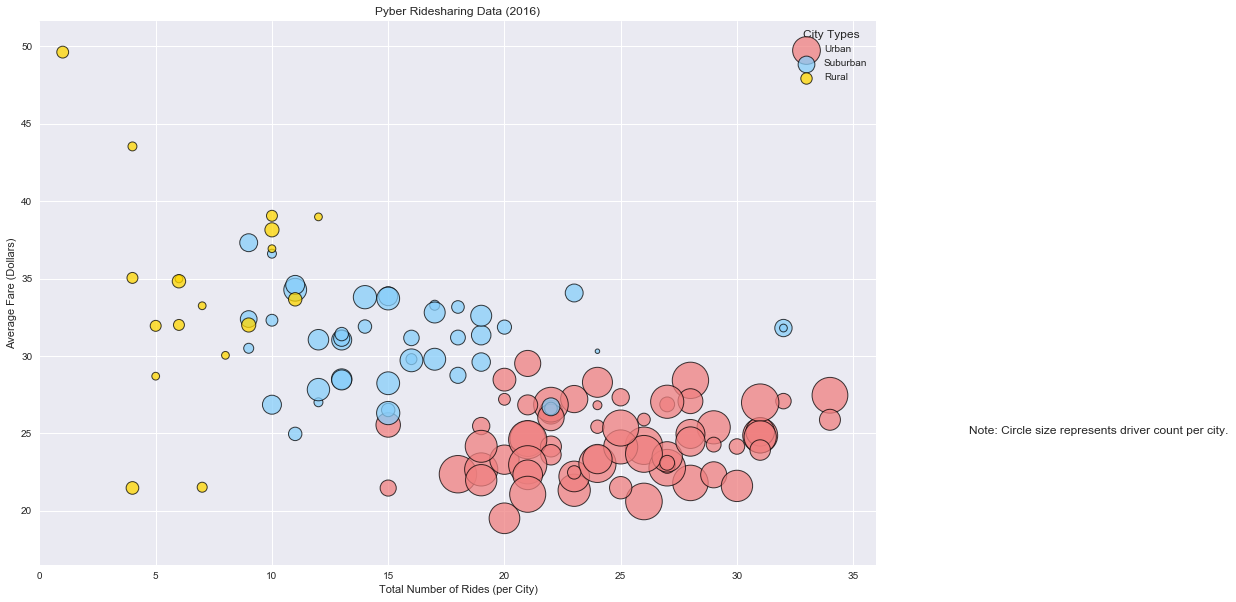

In [17]:
#bubbleplot using matplotlib


# colors = ["gold", "lightskyblue", "lightcoral"]
s_multiplier = 20

# URBAN 
#x-axis is number of rides
urban = city_summary.loc[city_summary['type'] == 'Urban',:]
x_axis = urban['number_of_rides']
      
#y-axis is avg fare 
y_axis = urban['avg_fare'] 

plt.figure(figsize=(15,10))

plt.scatter(x_axis, y_axis, marker="o", facecolors="lightcoral", edgecolors="black",linewidths=1,
           s=s_multiplier*urban['driver_count'], alpha=0.75,label='Urban') 

# SUBURBAN 
#x-axis is number of rides
suburban = city_summary.loc[city_summary['type'] == 'Suburban',:]
x_axis = suburban['number_of_rides']
      
#y-axis is avg fare 
y_axis = suburban['avg_fare'] 

plt.scatter(x_axis, y_axis, marker="o", facecolors="lightskyblue", edgecolors="black",linewidths=1,
           s=s_multiplier*suburban['driver_count'], alpha=0.75,label='Suburban') 

# RURAL
#x-axis is number of rides
rural = city_summary.loc[city_summary['type'] == 'Rural',:]
x_axis = rural['number_of_rides']
      
#y-axis is avg fare 
y_axis = rural['avg_fare'] 

plt.scatter(x_axis, y_axis, marker="o", facecolors="gold", edgecolors="black",linewidths=1,
           s=s_multiplier*rural['driver_count'], alpha=0.75,label='Rural') 


plt.title("Pyber Ridesharing Data (2016)")
plt.xlabel("Total Number of Rides (per City)")
plt.ylabel("Average Fare (Dollars)")

#x and y lims based on the entire dataset
plt.ylim(city_summary['avg_fare'].min()-3, city_summary['avg_fare'].max()+2)
plt.xlim(0, city_summary['number_of_rides'].max()+2)

# create the note on the outside of the plot
plt.text(40,25,"Note: Circle size represents driver count per city.")

#add the legend
plt.legend(title = "City Types")


plt.show()


# Seaborn Chart is below.
## NOTE: The bubble sizes are INCORRECT when colors are used. This is a bug in Seaborn. I have a test file that proves this. It is also included in my Github for this assignment.


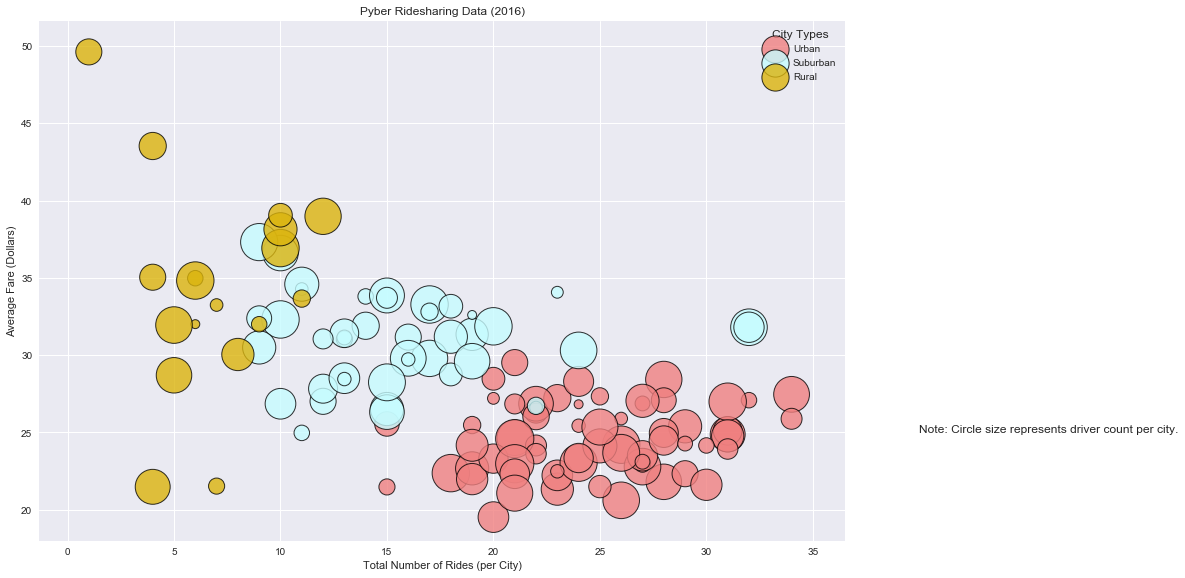

In [18]:
#THE SAME BUBBLE CHART USING SEABORN

####  NOTE!!!! ###### Bubble sizes are incorrect when colors are used. Bubble sizes would be correct if all bubbles are a single color.


colors = ["lightcoral", "#c6fcff", "#dbb40c"]

markersize = 20* city_summary['driver_count']

kws = {"edgecolor":'black','linewidths':1,"s": markersize}

ax = sns.lmplot(x="number_of_rides", y="avg_fare", data=city_summary, hue="type",fit_reg=False,palette=colors,
        legend_out=False,legend=False, size=8,aspect=1.5, hue_order=["Urban","Suburban","Rural"],
               scatter_kws=kws) 

plt.legend(title = "City Types",loc="best")
plt.title("Pyber Ridesharing Data (2016)")
plt.xlabel("Total Number of Rides (per City)")
plt.ylabel("Average Fare (Dollars)")

# create the note on the outside of the plot
plt.text(40,25,"Note: Circle size represents driver count per city.")

plt.show()



### Percentage of Fares by City Type
### Percentage of Rides by City Type
### Percentage of Total Drivers by City Type

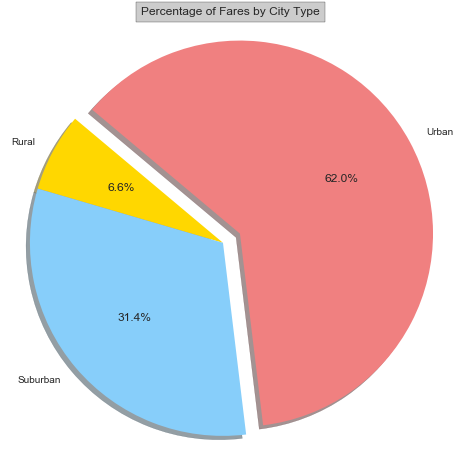

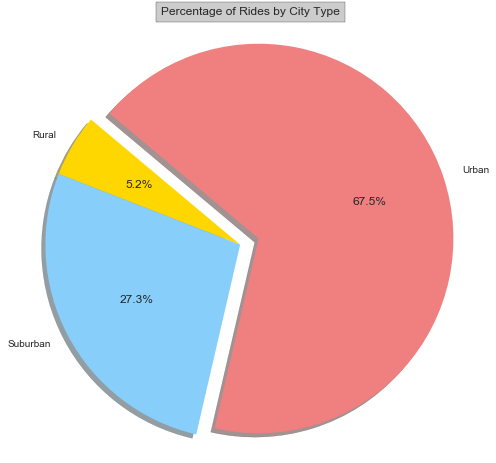

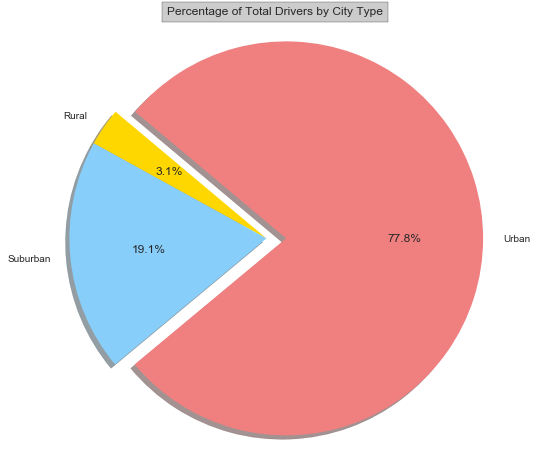

In [19]:
#make 3 pie charts in a loop 


# The colors of each section of the pie chart
colors = ["gold", "lightskyblue", "lightcoral"]

# Separate the Urban section from the others
explode = (0.0, 0.0, 0.1)

titles = ['Fares','Rides','Total Drivers']

#set up some lists for the loop
column_names = ['total_fare','number_of_rides','driver_count']

for i in range(0, 3):
    df = pd.DataFrame(types[column_names[i]].sum())

    df.reset_index(inplace = True)

    #set the size of the pie chart
    plt.figure(figsize=(8,8))
    
    # Labels for the sections of our pie chart
    labels = df['type']

    # The values of each section of the pie chart
    sizes = df[column_names[i]]
    
    #add the title of the chart
    pie_title = 'Percentage of ' + titles[i] + ' by City Type'
    plt.title(pie_title, bbox={'facecolor':'0.8', 'pad':5})
        

    # Create the pie chart based upon the values above
    # Automatically find the percentages of each part of the pie chart
    plt.pie(sizes, explode=explode, labels=labels, colors=colors,
            autopct="%1.1f%%", shadow=True, startangle=140)
    plt.axis("equal")

    plt.show()
    
#end loop    